In [ ]:
# default_exp profiling

# Profiling

> some utils I want to keep reusing

In [ ]:
#hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#local
#hide
from nbdev.showdoc import *

In [ ]:
#exporti
import time
import warnings
from functools import wraps

PROF_DATA = {}

In [ ]:
#export
def profile_call(fn):
    'decorator to profile a method - stores data in PROF_DATA'
    @wraps(fn)
    def with_profiling(*args, **kwargs):
        start_time = time.time()
        ret = fn(*args, **kwargs)
        elapsed_time = time.time() - start_time

        if fn.__name__ not in PROF_DATA:
            PROF_DATA[fn.__name__] = [0, [],0]
        PROF_DATA[fn.__name__][0] += 1
        PROF_DATA[fn.__name__][1].append(elapsed_time)

        return ret

    return with_profiling

def _print_data(fname, data):
    max_time = max(data[1])
    avg_time = sum(data[1]) / len(data[1])
    print(f'Function {fname} called {data[0]} times.')
    print(f'Execution time max: {max_time:.3f}, average: {avg_time:.3f}')

def print_prof_data(fname=None):
    'print out profile data'
    if fname is not None:
        if fname not in PROF_DATA:
            warnings.warn(f'Function {fname} has no profile data')
            return
        _print_data(fname, PROF_DATA[fname])
        return
    
    for fname, data in PROF_DATA.items():
        _print_data(fname, data)

def clear_prof_data():
    'clear out profile data'
    global PROF_DATA
    PROF_DATA = {}
    
def get_prof_data(name):
    'get profile data for name'
    return None if name not in PROF_DATA else PROF_DATA[name][1]

In [ ]:
#export
def start_record(name):
    'start recording time for name'
    start_time = time.time()
    if name not in PROF_DATA:
        PROF_DATA[name] = [0, [],0]
    if PROF_DATA[name][2] != 0:
        warnings.warn(f'function {name} start time not recorded because start time has already been recorded')
        return
    PROF_DATA[name][2] = start_time

def end_record(name):
    'end recording time and add elapsed time to profile data'
    if name not in PROF_DATA:
        warnings.warn(f'function {name} end time not recorded because start time not found')
        return
    start_time = PROF_DATA[name][2]
    elapsed_time = time.time() - start_time
    PROF_DATA[name][2] = 0
    PROF_DATA[name][0] += 1
    PROF_DATA[name][1].append(elapsed_time)
    


In [ ]:
@profile_call
def test_func(t=2.0):
    time.sleep(t)

for i in range(10):
    test_func(i)

print_prof_data()

Function test_func called 10 times.
Execution time max: 9.003, average: 4.503


In [ ]:
times = get_prof_data('test_func'); times

[8.106231689453125e-06,
 1.0042071342468262,
 2.005037784576416,
 3.0050208568573,
 4.001191139221191,
 5.004995107650757,
 6.00493311882019,
 7.002206087112427,
 7.999983072280884,
 9.00339674949646]

In [ ]:
PROF_DATA

{'test_func': [10,
  [8.106231689453125e-06,
   1.0042071342468262,
   2.005037784576416,
   3.0050208568573,
   4.001191139221191,
   5.004995107650757,
   6.00493311882019,
   7.002206087112427,
   7.999983072280884,
   9.00339674949646],
  0]}

In [ ]:
for i in range(10):
    start_record('sleep')
    time.sleep(i)
    end_record('sleep')

In [ ]:
print_prof_data('sleep')
times2 = get_prof_data('sleep')

Function sleep called 10 times.
Execution time max: 9.004, average: 4.502


In [ ]:
clear_prof_data()

In [ ]:
PROF_DATA

{}

In [ ]:
#local
import matplotlib.pyplot as plt

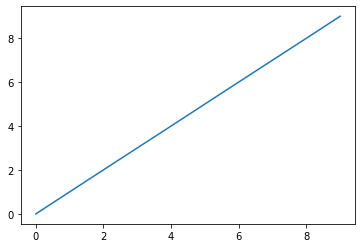

In [ ]:
#local
plt.plot(times);

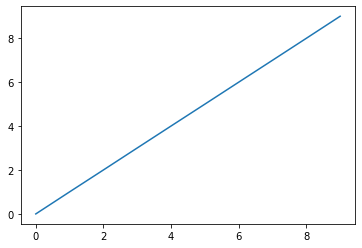

In [ ]:
#local
plt.plot(times2);